In [480]:
import numpy as np
import scipy.io
import math

In [481]:
#get matlab data as nested dictionary
training = scipy.io.loadmat('ECG_train.mat')
testing = scipy.io.loadmat('ECG_test.mat')

#extract data from dictionaries
X_normal = training['X_train_normal']
X_abnormal = training['X_train_abnormal']

X_normal_test = testing['X_test_normal']
X_abnormal_test = testing['X_test_abnormal']

In [482]:
k = 4 # number of neighbors to consider
T_MAX = 1000
alpha0 = 0.9

In [483]:
def sample_func(X,t):
    index = t%X.shape[0]
    return X[index]

In [484]:
def euclidian_distance(x1,x2):
    return abs(np.linalg.norm(x1-x2))

def getLearningRate(t, alpha0, beta):
    return alpha0 * math.exp(-t*beta)

distance = euclidian_distance

In [485]:
def getBMU(prototypes, sample, distance):
    #init variables
    best_dist = float("inf")
    best_vec = 0

    #check every prototype vector
    index = 0
    bmu_index = 0
    for proto in prototypes:
        #check if distance between sample and prototype < current lowest
        new_dist = distance(sample,proto)
        if  new_dist < best_dist:
            best_dist = new_dist
            best_vec = proto
            bmu_index = index
        index += 1
    
    return bmu_index, best_vec


In [486]:
#True: Normal ; False: Abnormal
def getClassification(sample):
    i1, bmu0 = getBMU(prototypes[0], sample, distance)
    i2, bmu1 = getBMU(prototypes[1], sample, distance)
    if(distance(sample, bmu0) > distance(sample, bmu1)):
        return True 
    else:
        return False

In [489]:
normal_correct = []
abnormal_correct = []
for k in range(1, 15):
    prototypes = [None] * 2

    for i in range(0,2):
        X = []
        if(i == 1):
            X = X_normal
        else:
            X = X_abnormal
        #get center of data
        avg = np.zeros((1,X[0].shape[0]))
        total = 0
        #take sum of all vectors
        for x in X:
            avg += x
            total += 1
        #compute average
        avg = avg * 1/total
        prototypes[i] = np.tile(avg, (k, 1) ) + (0.5*np.ones((k, X[0].shape[0])) - np.random.rand(k, X[0].shape[0]))
        beta = math.log(10)/T_MAX
        #Loop through t:
        t = 0
        while t < T_MAX:
            sample = sample_func(X,t)
            bmu_index, bmu = getBMU(prototypes[i], sample, distance)
            alpha = getLearningRate(t, alpha0, beta)

            #update the best matching prototype vector
            index = 0
            prototypes[i][bmu_index] = bmu + alpha*(sample - bmu)
            t += 1
        #we are done!

    confusion_matrix = np.zeros((2,2))

    #Classifying:
    for x in X_normal_test:
        if getClassification(x):
            confusion_matrix[0][0] += 1
        else:
            confusion_matrix[1][0] += 1

    for x in X_abnormal_test:
        if getClassification(x):
            confusion_matrix[0][1] += 1
        else:
            confusion_matrix[1][1] += 1
    total_normal = confusion_matrix[0][0]+confusion_matrix[1][0]
    total_abnormal = confusion_matrix[0][1]+confusion_matrix[1][1]
    normal_correct.append(confusion_matrix[0][0]/total_normal)
    abnormal_correct.append(confusion_matrix[1][1]/total_abnormal)



'\nplt.plot(normal_correct, color = \'b\')\nplt.plot(abnormal_correct, color = \'g\')\nplt.title("Number of Prototype Vectors vs Percent Correct")\nplt.ylabel(\'Percent Correct\')\nplt.xlabel(\'Number of prototype vectors\')\n#plt.show()\nplt.legend([\'Normal Heartbeat\', \'Abnormal Heartbeat\'])\nplt.savefig(\'LVQ_varrying_k.png\')\n'

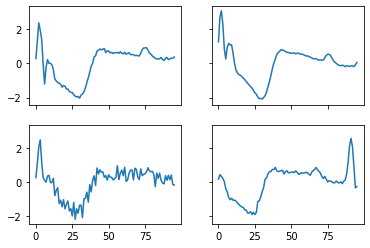

In [523]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
'''
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
beat_type = 0
#beat_type = 1

axs[0,0].plot(prototypes[beat_type][0])
axs[0,0].set_title("Prototype vector 1")
plt.xlabel("time (ms)")
plt.ylabel("amplitude (mm)")


axs[0,1].plot(prototypes[beat_type][1])
axs[0,1].set_title("Prototype vector 2")
plt.xlabel("time (ms)")
plt.ylabel("amplitude (mm)")


axs[1,0].plot(prototypes[beat_type][2])
axs[1,0].set_title("Prototype vector 3")
plt.xlabel("time (ms)")
plt.ylabel("amplitude (mm)")

axs[1,1].plot(prototypes[beat_type][3])
axs[1,1].set_title("Prototype vector 4")
'''

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
beat_type = 1
#beat_type = 1

axs[0,0].plot(prototypes[beat_type][0])
#axs[0,0].set_title("")

axs[0,1].plot(prototypes[beat_type][1])
#axs[0,1].set_title("Prototype vector 2")


axs[1,0].plot(prototypes[beat_type][2])
#axs[1,0].set_title("Prototype vector 3")

axs[1,1].plot(prototypes[beat_type][3])


#fig.subplots_adjust(left=1.0, top=2.0, right=3.0)
#plt.xlabel("time (ms)")
#plt.ylabel("amplitude (mm)")

plt.savefig('LVQ_prototypes_abnormal_ECG.png')

'''
plt.plot(normal_correct, color = 'b')
plt.plot(abnormal_correct, color = 'g')
plt.title("Number of Prototype Vectors vs Percent Correct")
plt.ylabel('Percent Correct')
plt.xlabel('Number of prototype vectors')
#plt.show()
plt.legend(['Normal Heartbeat', 'Abnormal Heartbeat'])
plt.savefig('LVQ_varrying_k.png')
'''